# Assignment 2 - Image Enhancement

In [1]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import convert_images

In [2]:
images = []
data_src = Path("data")

for img in data_src.iterdir():
    images.append(cv2.imread(str(img)))

images = np.array(images)

In [3]:
rgb_images = convert_images(images, cv2.COLOR_BGR2RGB)
lab_images = convert_images(images, cv2.COLOR_BGR2Lab)

In [4]:
x_click = 0
y_click = 0

def mouse_callback(event, x, y, flags, param):
    global x_click, y_click
    if event == cv2.EVENT_LBUTTONDOWN:
        print(f"Left button clicked at ({x}, {y})")
        x_click = x
        y_click = y

In [5]:
cv2.imshow("Image", images[0])
cv2.setMouseCallback('Image', mouse_callback)
cv2.waitKey(0)
cv2.destroyAllWindows()

Left button clicked at (790, 505)


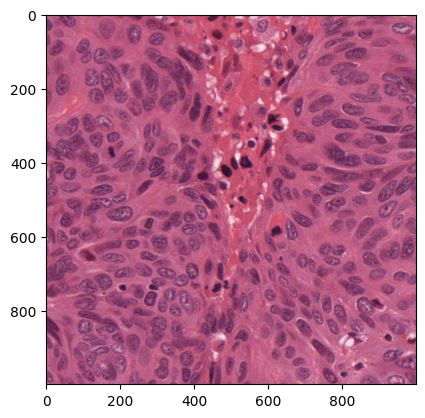

In [6]:
plt.imshow(rgb_images[0])

(503.0, 507.0)

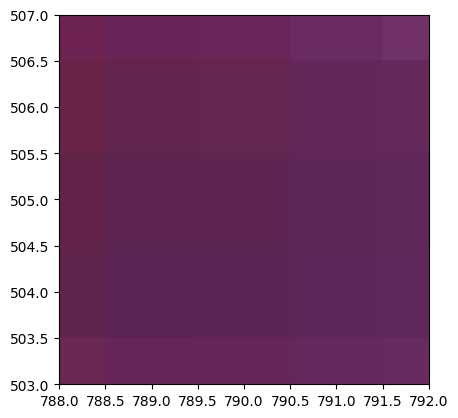

In [7]:
nucleus_radius = 2

x_low = x_click - nucleus_radius
x_high = x_click + nucleus_radius

y_low = y_click - nucleus_radius
y_high = y_click + nucleus_radius

plt.imshow(rgb_images[0])
plt.xlim([x_low, x_high])
plt.ylim([y_low, y_high])

In [8]:
split_lab_img = cv2.split(lab_images[0])
L_ch_nucleus = split_lab_img[0][x_low:x_high, y_low:y_high]
a_ch_nucleus = split_lab_img[1][x_low:x_high, y_low:y_high]
b_ch_nucleus = split_lab_img[2][x_low:x_high, y_low:y_high]

print(L_ch_nucleus.shape)
print(a_ch_nucleus.shape)
print(b_ch_nucleus.shape)

(4, 4)
(4, 4)
(4, 4)


In [9]:
L_mean_nucleus = np.mean(L_ch_nucleus)
a_mean_nucleus = np.mean(a_ch_nucleus)
b_mean_nucleus = np.mean(b_ch_nucleus)

print(L_mean_nucleus, a_mean_nucleus, b_mean_nucleus)

103.5625 168.5625 122.8125


In [10]:
delta_L = split_lab_img[0] - L_mean_nucleus
delta_a = split_lab_img[1] - a_mean_nucleus
delta_b = split_lab_img[2] - b_mean_nucleus

print(np.min(delta_L), np.min(delta_a), np.min(delta_b))
print(np.max(delta_L), np.max(delta_a), np.max(delta_b))

-83.5625 -39.5625 -39.8125
137.4375 18.4375 32.1875


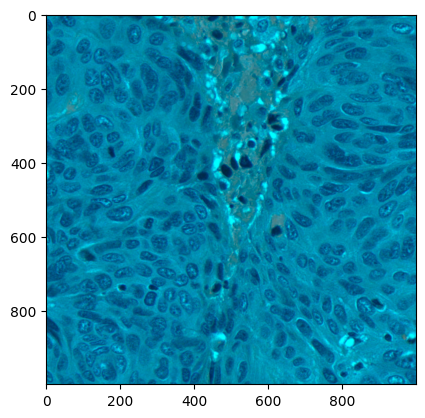

In [11]:
lab_img_new = cv2.merge([delta_L, delta_a, delta_b])
lab_img_new = cv2.normalize(lab_img_new, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
rgb_img_new = cv2.cvtColor(lab_img_new, cv2.COLOR_Lab2RGB)
plt.imshow(rgb_img_new)

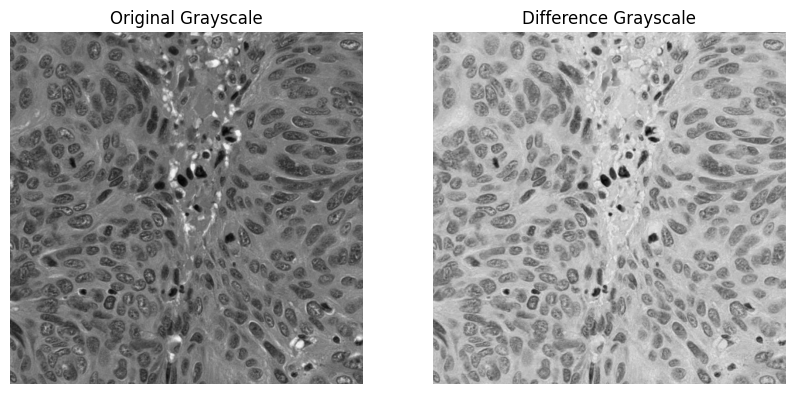

In [12]:
gray_img = cv2.cvtColor(lab_img_new, cv2.COLOR_RGB2GRAY)

rows = 1
columns = 2

fig = plt.figure(figsize=(10, 5))

fig.add_subplot(rows, columns, 1)
plt.axis("off")
plt.title("Original Grayscale")
plt.imshow(cv2.cvtColor(images[0], cv2.COLOR_BGR2GRAY), cmap="gray")

fig.add_subplot(rows, columns, 2)
plt.axis("off")
plt.title("Difference Grayscale")
plt.imshow(gray_img, cmap="gray")